Import all necessity packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Importing file data and visualisation

In [2]:
data_v1=pd.read_csv('BHARTIARTL.csv')
data_v1.head()


C:\Users\anjul\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,_id,sid,scriptname,scriptcode,value,sign,net_count,perc,high,low,...,cfl916_maxd30_fl916,change_mind30ltp_time,cfl916_mind30_fl916,change_maxs30ltp_time,cfl916_maxs30_fl916,change_mins30ltp_time,cfl916_mins30_fl916,level_position_flag,d30s30levelindex,change_flag_time
0,1.610000e+12,1613710000000,BHARTIARTL,10604,28774890.00,1,0,0.3,590.75,590.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN
1,1.610000e+12,1613710000000,BHARTIARTL,10604,37438038.00,1,0,0.3,590.85,590.00,...,0.0,2021-02-19T09:15:10.445Z,0.0,2021-02-19T09:15:10.445Z,0.0,2021-02-19T09:15:10.445Z,0.0,1,1,NaN
2,1.610000e+12,1613710000000,BHARTIARTL,10604,40689257.95,1,0,0.3,590.85,590.00,...,0.0,2021-02-19T09:15:10.445Z,0.0,2021-02-19T09:15:10.445Z,0.0,2021-02-19T09:15:10.445Z,0.0,1,1,NaN
3,1.610000e+12,1613710000000,BHARTIARTL,10604,45336491.75,-1,0,0.2,590.85,590.00,...,0.0,2021-02-19T09:15:12.271Z,0.0,2021-02-19T09:15:12.271Z,0.0,2021-02-19T09:15:10.445Z,0.0,4,4,NaN
4,1.610000e+12,1613710000000,BHARTIARTL,10604,57642206.97,-1,0,0.0,590.85,589.25,...,0.0,2021-02-19T09:15:13.083Z,0.0,2021-02-19T09:15:13.083Z,0.0,2021-02-19T09:15:10.445Z,0.0,4,4,NaN


In [3]:

len(data_v1.index)

21149

In [4]:
#removing row with fl916 data as Field!


data_v1=data_v1[data_v1.fl916 != '#FIELD!']
len(data_v1.index)

21148

In [5]:
data_v1.dtypes

_id                      float64
sid                        int64
scriptname                object
scriptcode                 int64
value                    float64
                          ...   
change_mins30ltp_time     object
cfl916_mins30_fl916      float64
level_position_flag        int64
d30s30levelindex           int64
change_flag_time         float64
Length: 157, dtype: object

In [6]:
#taking only valuable columns for first regression

data_v2= data_v1.filter(['sid','ltp','updatetime','pvr','volume','volumechange','fl916'], axis=1)
data_v2['fl916']=data_v2['fl916'].astype(float)

data_v2.head()

,sid,ltp,updatetime,pvr,volume,volumechange,fl916
0,1613710000000,590.75,2021-02-19T09:15:07.457Z,12.6,48771,48771,0.0
1,1613710000000,590.70,2021-02-19T09:15:10.445Z,9.4,63450,13409,0.0
2,1613710000000,590.70,2021-02-19T09:15:11.400Z,10.2,68959,5509,0.0
3,1613710000000,590.00,2021-02-19T09:15:12.271Z,7.2,76835,-7876,0.0
4,1613710000000,589.25,2021-02-19T09:15:13.083Z,9.2,97697,-20862,0.0


In [7]:
##corelation in dataset v2

op_co_v2= data_v2.corr()
op_co_v2

,sid,ltp,pvr,volume,volumechange,fl916
sid,1.000000,-0.823135,-0.495758,0.907043,-0.002054,-0.902132
ltp,-0.823135,1.000000,0.410799,-0.908839,0.012239,0.950971
pvr,-0.495758,0.410799,1.000000,-0.644588,0.007873,0.579640
volume,0.907043,-0.908839,-0.644588,1.000000,-0.003824,-0.987704
volumechange,-0.002054,0.012239,0.007873,-0.003824,1.000000,0.006004
fl916,-0.902132,0.950971,0.579640,-0.987704,0.006004,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000204E1814280>,
      dtype=object)

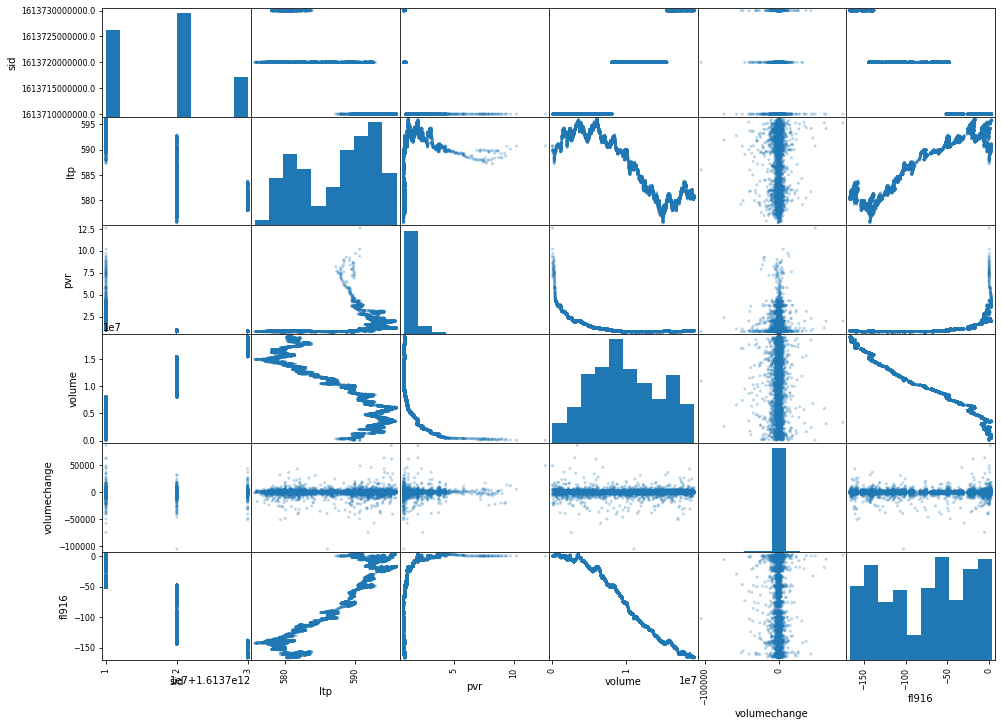

In [8]:
##plot the graph 

#import required packages 
from pandas.plotting import scatter_matrix

scatter_matrix(data_v2,figsize=(16,12),alpha=0.3)

<h1> Evaluation from above scatter plot :</h1>
    
1. ltp is directly varying with pvr for early stage and later fluctuations.
2. With inctrreasing pvr - volumne data is exponentially decreasing
3. Mostly volumechange data is constant for all other parameters, as it is forming a perpendicular linearity wrt volumne, pvr and ltp
    

<H2> Evaluating all columns wrt ltp

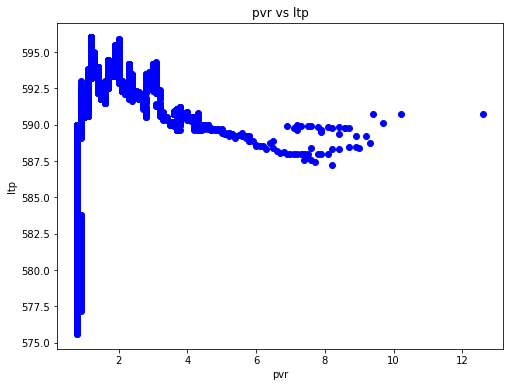

In [9]:
#pvr vs ltp

plt.figure(figsize=(8,6))
plt.scatter(data_v2.pvr, data_v2.ltp, color='blue')
plt.xlabel('pvr')
plt.ylabel('ltp')
plt.title('pvr vs ltp')
plt.show()

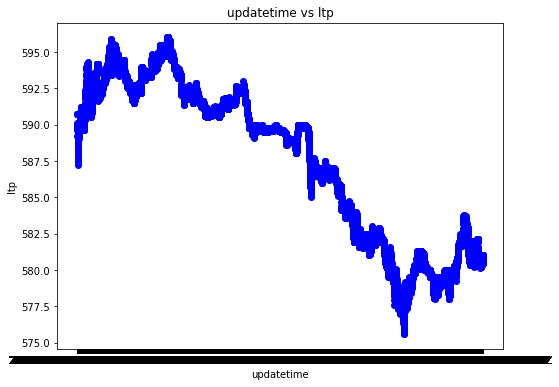

In [10]:
#Updatetime wrt ltp
plt.figure(figsize=(8,6))
plt.scatter(data_v2.updatetime, data_v2.ltp, color='blue')
plt.xlabel('updatetime')
plt.ylabel('ltp')
plt.title('updatetime vs ltp')
plt.show()


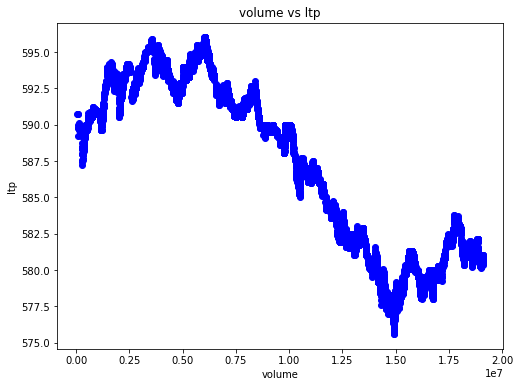

In [11]:
#volume wrt ltp
plt.figure(figsize=(8,6))
plt.scatter(data_v2.volume, data_v2.ltp, color='blue')
plt.xlabel('volume')
plt.ylabel('ltp')
plt.title('volume vs ltp')
plt.show()

In [12]:
#fl916 wrt ltp
#plt.figure(figsize=(8,6))
#plt.scatter(data_v2.fl916, data_v2.ltp, color='blue')
#plt.xlabel('fl916')
#plt.ylabel('ltp')
#plt.title('fl916 vs ltp')
#plt.show()

z=1
#error --- fl916 - has negative value, due to which matplotlib is not plotting .. Needs Investigation

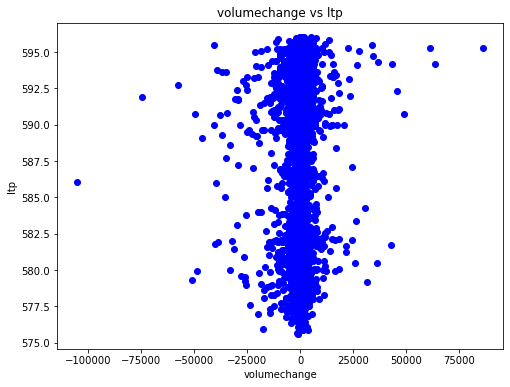

In [13]:
#volume wrt ltp
plt.figure(figsize=(8,6))
plt.scatter(data_v2.volumechange, data_v2.ltp, color='blue')
plt.xlabel('volumechange')
plt.ylabel('ltp')
plt.title('volumechange vs ltp')
plt.show()

Train and test data 

In [14]:
X = data_v2.filter(['pvr','volume','volumechange','fl916'],axis=1)
y = data_v2['ltp']
X.head()

,pvr,volume,volumechange,fl916
0,12.6,48771,48771,0.0
1,9.4,63450,13409,0.0
2,10.2,68959,5509,0.0
3,7.2,76835,-7876,0.0
4,9.2,97697,-20862,0.0


In [15]:
y.head()

0    590.75
1    590.70
2    590.70
3    590.00
4    589.25
Name: ltp, dtype: float64

In [16]:
X.dtypes

X['fl916'].astype('float')


0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
          ...  
21144   -165.62
21145   -165.58
21146   -165.64
21147   -165.60
21148   -165.58
Name: fl916, Length: 21148, dtype: float64

In [17]:
#split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

print(len(X_train.index))
print(len(X_test.index))
print(len(y_train.index))
print(len(y_test.index))

# train and test data should be 80:20 ratio

16918
4230
16918
4230


<h1> Linear Regression models 

<H3> Model 1 - no change in fl916

In [18]:
from sklearn.linear_model import LinearRegression


lm = LinearRegression()  # create object for the class
model_1=lm.fit(X_train, y_train)  # perform linear regression
Y_pred = lm.predict(X_test)  # make predictions

print(Y_pred)
#Y_pred predict dependent values

[584.13262022 579.74180175 592.84643845 ... 594.19759548 587.94647172
 592.51202934]


In [19]:
Y_pred

array([584.13262022, 579.74180175, 592.84643845, ..., 594.19759548,
       587.94647172, 592.51202934])

In [20]:
#calculating accuracy of the model :


from sklearn.metrics import r2_score
r2_1=r2_score(y_test,Y_pred)
print('R-square of linear model ', r2_1)

R-square of linear model  0.9483737906736659


Our Linear Regression Model is 94.8 % accurate

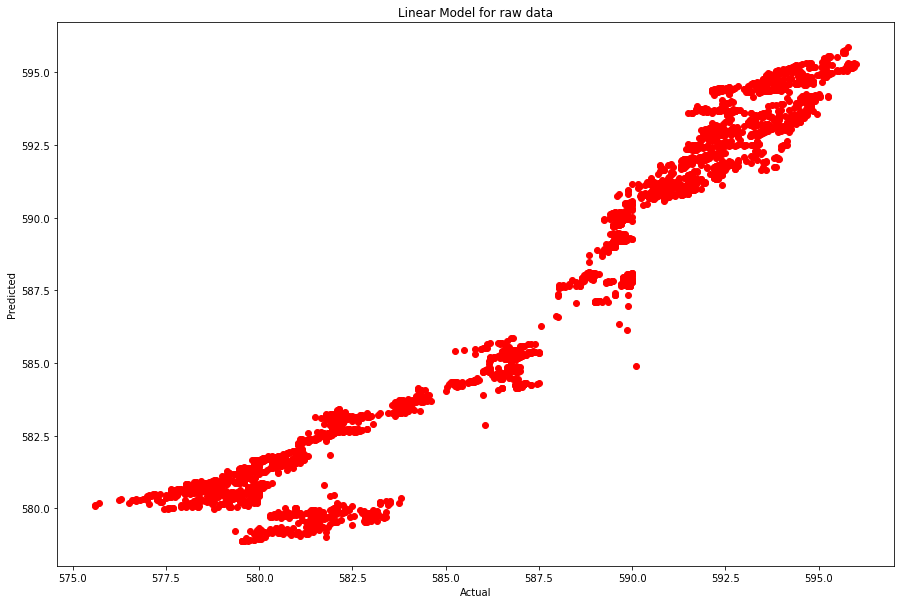

In [21]:
#plotting regression model

plt.figure(figsize=(15,10))
plt.scatter(y_test, Y_pred, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Model for raw data')
plt.show()

<h5> Example prediction

In [22]:
lm.predict([[9.4,63450, 13409,0]])

array([585.11475271])

<h3> Model2- Dataset without volumechange column

In [23]:
data_v3= data_v2.filter(['pvr','volume','fl916'],axis=1)
data_v3.head()

,pvr,volume,fl916
0,12.6,48771,0.0
1,9.4,63450,0.0
2,10.2,68959,0.0
3,7.2,76835,0.0
4,9.2,97697,0.0


In [24]:
X = data_v3
y = data_v2['ltp']
X.head()

,pvr,volume,fl916
0,12.6,48771,0.0
1,9.4,63450,0.0
2,10.2,68959,0.0
3,7.2,76835,0.0
4,9.2,97697,0.0


In [25]:
y.head()

0    590.75
1    590.70
2    590.70
3    590.00
4    589.25
Name: ltp, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

print(len(X_train.index))
print(len(X_test.index))
print(len(y_train.index))
print(len(y_test.index))

16918
4230
16918
4230


In [27]:

lm2 = LinearRegression()  # create object for the class
model_2=lm2.fit(X_train, y_train)  # perform linear regression
Y_pred = lm2.predict(X_test)  # make predictions

print(Y_pred)
#Y_pred predict dependent values

[584.12997739 579.72564912 592.84050977 ... 594.19169624 587.94419081
 592.50596852]


In [28]:
#calculating accuracy of the model :

r2_1=r2_score(y_test,Y_pred)
print('R-square of linear model ', r2_1)

R-square of linear model  0.9483700174237073


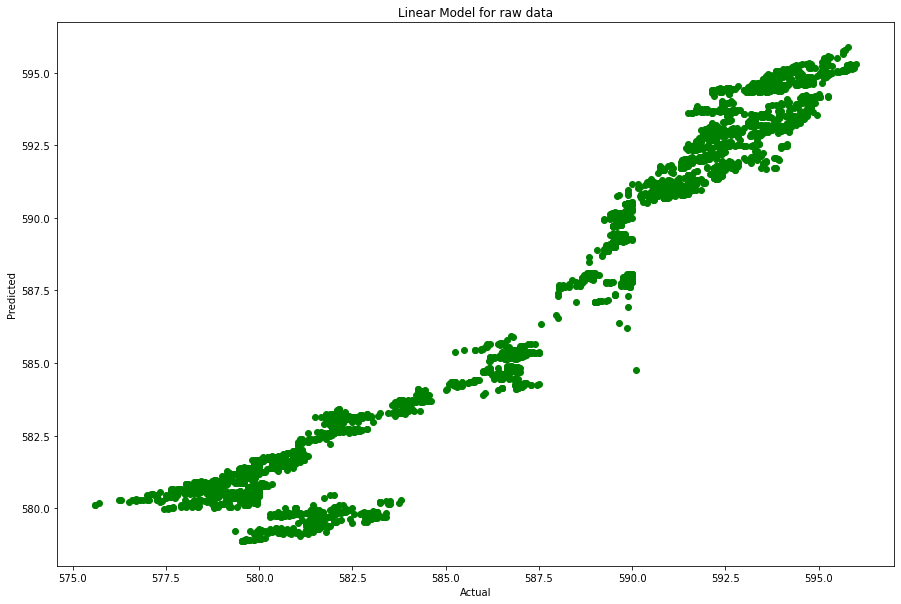

In [29]:
#plotting regression model

plt.figure(figsize=(15,10))
plt.scatter(y_test, Y_pred, color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Model for raw data')
plt.show()

## There is no change in Linear regression model if we remove volumnechange column. Hence, Volumechange column does'nt impact ltp

<H3> Model 3 - getting difference in amount fl916 per second

In [30]:
#data set 4 where we will get the difference in column fl916 as it is commulative sum with time

data_v4= data_v2
data_v4['fl916_sec']= 0
data_v4['fl916_sec']=data_v4['fl916_sec'].astype(float)
data_v4['fl916']=data_v4['fl916'].astype(float)


def cfl916_sec_dif() :
#data_v4.head()
    cnt=0
    for index, row in data_v4.iterrows():
        #print(row['sid'], row['ltp']
        if (index==0):
            data_v4.iloc[cnt,7]= data_v4.iloc[cnt,6]
        else: 
            data_v4.iloc[cnt,7]= data_v4.iloc[cnt,6]-prev_fl916
        prev_fl916=data_v4.iloc[cnt,6]
        prev_fl916.astype(float)
        cnt+=1
        
# Driver Code
if __name__=='__main__':
    cfl916_sec_dif()
    #data_v3.drop(['8'],axis=1)


In [31]:
data_v4.tail()

,sid,ltp,updatetime,pvr,volume,volumechange,fl916,fl916_sec
21144,1613730000000,580.55,2021-02-19T15:29:55.033Z,0.9,19096137,-750,-165.62,-0.04
21145,1613730000000,580.95,2021-02-19T15:29:56.016Z,0.9,19096819,682,-165.58,0.04
21146,1613730000000,580.50,2021-02-19T15:29:57.006Z,0.9,19097855,-1036,-165.64,-0.06
21147,1613730000000,580.95,2021-02-19T15:29:58.174Z,0.9,19098662,807,-165.60,0.04
21148,1613730000000,581.00,2021-02-19T15:29:59.026Z,0.9,19098893,231,-165.58,0.02


<H4> Plotting co-relation and Linear regression for this dataset

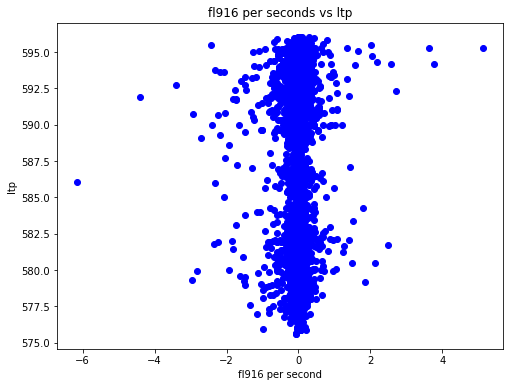

In [32]:
#fl916 wrt ltp per seconds
plt.figure(figsize=(8,6))
plt.scatter(data_v4.fl916_sec, data_v4.ltp, color='blue')
plt.xlabel('fl916 per second')
plt.ylabel('ltp')
plt.title('fl916 per seconds vs ltp')
plt.show()

In [33]:
X = data_v4.filter(['pvr','volume','fl916_sec'])
y = data_v4['ltp']
X.tail()

,pvr,volume,fl916_sec
21144,0.9,19096137,-0.04
21145,0.9,19096819,0.04
21146,0.9,19097855,-0.06
21147,0.9,19098662,0.04
21148,0.9,19098893,0.02


In [34]:
y.tail()

21144    580.55
21145    580.95
21146    580.50
21147    580.95
21148    581.00
Name: ltp, dtype: float64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

print(len(X_train.index))
print(len(X_test.index))
print(len(y_train.index))
print(len(y_test.index))

16918
4230
16918
4230


In [36]:

lm3 = LinearRegression()  # create object for the class
model_3=lm3.fit(X_train, y_train)  # perform linear regression
Y_pred = lm3.predict(X_test)  # make predictions

print(Y_pred)
#Y_pred predict dependent values

[586.93954022 576.96601109 594.12374086 ... 592.87360153 588.80890287
 594.40287819]


In [37]:
#calculating accuracy of the model :

r2_1=r2_score(y_test,Y_pred)
print('R-square of linear model ', r2_1)

R-square of linear model  0.8793923365064941


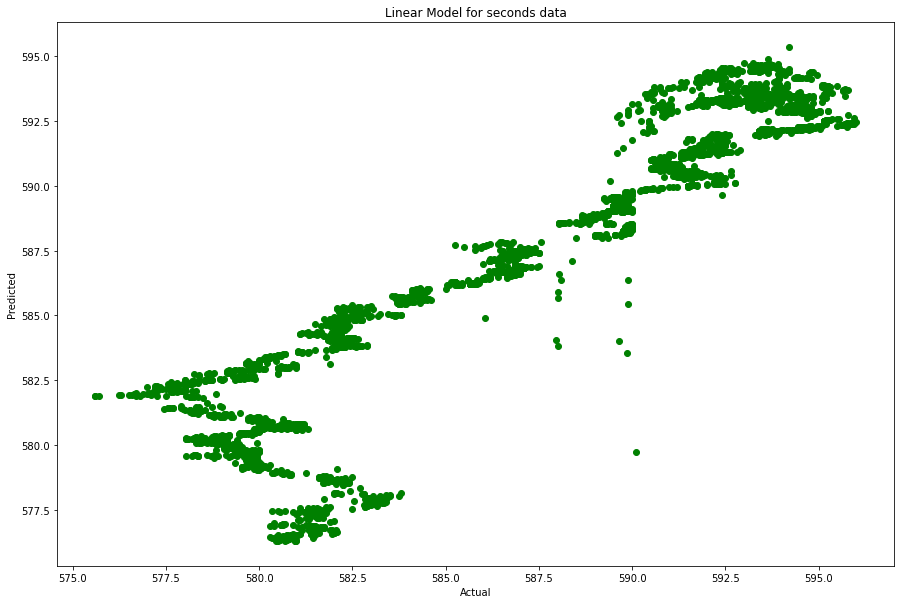

In [38]:
#plotting regression model

plt.figure(figsize=(15,10))
plt.scatter(y_test, Y_pred, color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Model for seconds data')
plt.show()

<H3> Model 4 - getting difference in amount fl916 per minute

In [39]:
#data set 5 where we will get the difference in column fl916 for every minute

#data_v5.iloc[0,0:1]= data_v2.iloc[0,0:1]
#data_v5['fl916']=data_v2.iloc[0,3]
#data_v5['fl916_min']=0
#data_v5['fl916_min']=data_v5['fl916_min'].astype(float)
#data_v5['fl916']=data_v5['fl916'].astype(float)
data_v5= pd.DataFrame(columns=['updatetime','pvr','volume','fl916','fl916_min','ltp'])
data_v5['pvr']=data_v5['pvr'].astype(float)
data_v5['volume']=data_v5['volume'].astype(float)
data_v5['fl916']=data_v5['fl916'].astype(float)
data_v5['fl916_min']=data_v5['fl916_min'].astype(float)
data_v5['ltp']=data_v5['ltp'].astype(float)


def cfl916_min_dif() :
    cnt=0
    mint=1
    row_data =[]
    for index, row in data_v2.iterrows():
        #print(index)
        row_data.append(data_v2.iloc[cnt,2]) #updatetime
        row_data.append(data_v2.iloc[cnt,3]) #pvr
        row_data.append(data_v2.iloc[cnt,4]) #volume
        row_data.append(data_v2.iloc[cnt,6]) #fl916
        row_data.append(0) #fl916_min
        row_data.append(data_v2.iloc[cnt,1])
        #print(row_data)
        if (index==0):
            data_v5.loc[cnt] = row_data
            prev_fl916=data_v5.iloc[cnt,3]
            #prev_fl916.astype(float)
        else: 
            if(cnt%60==0):
                data_v5.loc[mint] = row_data
                data_v5.iloc[mint,4]= data_v5.iloc[mint,3]-prev_fl916
                prev_fl916=data_v5.iloc[mint,3]
                mint+=1
        cnt+=1
        row_data.clear()
# Driver Code
if __name__=='__main__':
    cfl916_min_dif()
    




In [40]:
data_v5.head()

,updatetime,pvr,volume,fl916,fl916_min,ltp
0,2021-02-19T09:15:07.457Z,12.6,48771.0,0.00,0.00,590.75
1,2021-02-19T09:16:05.012Z,5.8,363540.0,0.63,0.63,588.85
2,2021-02-19T09:17:05.709Z,4.2,512880.0,0.46,-0.17,589.85
3,2021-02-19T09:18:05.808Z,3.8,687881.0,2.08,1.62,590.80
4,2021-02-19T09:19:05.903Z,3.7,874207.0,1.09,-0.99,591.00


In [41]:
data_v5.dtypes

updatetime     object
pvr           float64
volume        float64
fl916         float64
fl916_min     float64
ltp           float64
dtype: object

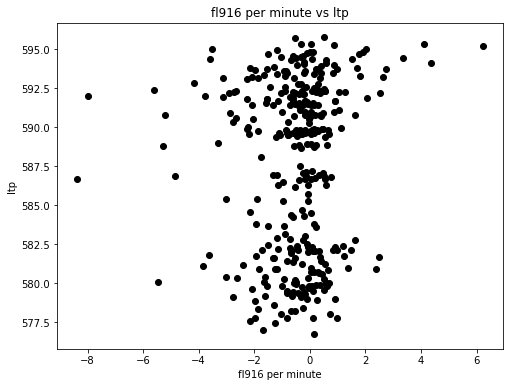

In [42]:
#fl916 wrt ltp per minute abd ltp
plt.figure(figsize=(8,6))
plt.scatter(data_v5.fl916_min, data_v5.ltp, color='black')
plt.xlabel('fl916 per minute')
plt.ylabel('ltp')
plt.title('fl916 per minute vs ltp')
plt.show()

In [43]:
X = data_v5.filter(['pvr','volume','fl916_min'])
y = data_v5['ltp']
X.tail()

,pvr,volume,fl916_min
348,0.9,18848827.0,1.49
349,0.9,18907751.0,-1.25
350,0.9,18973645.0,-0.93
351,0.9,19029721.0,0.14
352,0.9,19078716.0,0.29


In [44]:
y.tail()

348    582.15
349    580.90
350    580.25
351    580.70
352    580.75
Name: ltp, dtype: float64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

print(len(X_train.index))
print(len(X_test.index))
print(len(y_train.index))
print(len(y_test.index))

282
71
282
71


In [46]:
#linear regression model 4
lm4 = LinearRegression()  # create object for the class
model_4=lm4.fit(X_train, y_train)  # perform linear regression
Y_pred = lm4.predict(X_test)  # make predictions

print(Y_pred)
#Y_pred predict dependent values

[594.95509262 590.09810346 581.15898211 586.72924023 591.58349316
 585.79126359 590.83434353 593.06296797 593.65426436 581.31170809
 594.95870316 581.94779407 585.79863392 580.26939011 590.23126231
 587.18441041 590.13780492 582.30005127 592.92544359 579.29988439
 588.13191785 584.92317454 593.38742918 587.22652635 585.64735435
 586.15417748 592.54393059 592.34536264 595.40187029 591.26586772
 584.62557025 590.54806551 593.29202678 592.8813705  593.15485708
 588.36119464 589.30244591 591.69012355 583.87387152 590.49866016
 594.99433029 586.70804835 587.95087414 580.12733172 577.26828242
 581.50772192 591.02121526 592.50207861 592.63501045 589.17314287
 584.40933303 580.43742281 577.46248892 584.52938659 595.25233968
 593.2223404  577.67167812 588.40408455 584.06105277 586.47232613
 593.15565454 591.00921814 590.25208006 593.61035658 590.84589468
 584.60751713 582.77158543 588.90602086 587.12079112 579.58376404
 592.80743463]


In [47]:
#calculating accuracy of the model :

r2_1=r2_score(y_test,Y_pred)
print('R-square of linear model ', r2_1)

R-square of linear model  0.8669369531999944


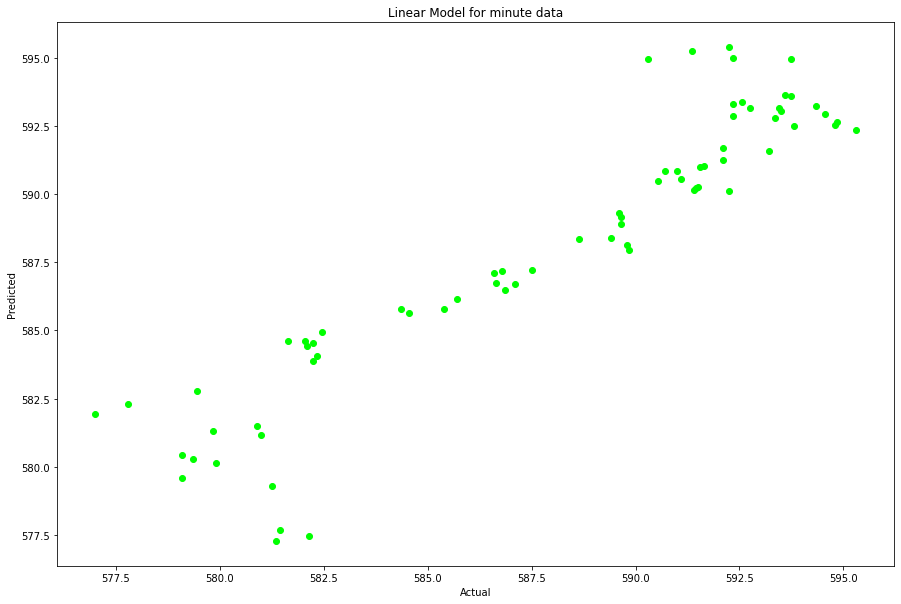

In [48]:
#plotting regression model

plt.figure(figsize=(15,10))
plt.scatter(y_test, Y_pred, color='lime')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Model for minute data')
plt.show()

<H3> Model 5 - getting difference in amount fl916 per 5 minutes

In [49]:
#data set 6 where we will get the difference in column fl916 for every 5 minutes


data_v6= pd.DataFrame(columns=['updatetime','pvr','volume','fl916','fl916_5min','ltp'])
data_v6['pvr']=data_v6['pvr'].astype(float)
data_v6['volume']=data_v6['volume'].astype(float)
data_v6['fl916']=data_v6['fl916'].astype(float)
data_v6['fl916_5min']=data_v6['fl916_5min'].astype(float)
data_v6['ltp']=data_v6['ltp'].astype(float)


def cfl916_5min_dif() :
    cnt=0
    mint=1
    row_data =[]
    for index, row in data_v2.iterrows():
        #print(index)
        row_data.append(data_v2.iloc[cnt,2]) #updatetime
        row_data.append(data_v2.iloc[cnt,3]) #pvr
        row_data.append(data_v2.iloc[cnt,4]) #volume
        row_data.append(data_v2.iloc[cnt,6]) #fl916
        row_data.append(0) #fl916_min
        row_data.append(data_v2.iloc[cnt,1])
        #print(row_data)
        if (index==0):
            data_v6.loc[cnt] = row_data
            prev_fl916=data_v6.iloc[cnt,3]
            #prev_fl916.astype(float)
        else: 
            if(cnt%300==0):
                data_v6.loc[mint] = row_data
                data_v6.iloc[mint,4]= data_v6.iloc[mint,3]-prev_fl916
                prev_fl916=data_v6.iloc[mint,3]
                mint+=1
        cnt+=1
        row_data.clear()
# Driver Code
if __name__=='__main__':
    cfl916_5min_dif()
    




In [50]:
data_v6.head()

,updatetime,pvr,volume,fl916,fl916_5min,ltp
0,2021-02-19T09:15:07.457Z,12.6,48771.0,0.00,0.00,590.75
1,2021-02-19T09:20:06.176Z,3.7,1104174.0,-1.67,-1.67,590.35
2,2021-02-19T09:25:07.246Z,3.0,1765294.0,-3.75,-2.08,592.85
3,2021-02-19T09:30:19.937Z,2.4,2163776.0,-5.26,-1.51,592.25
4,2021-02-19T09:35:31.226Z,2.2,2677558.0,-6.27,-1.01,592.35


In [51]:
data_v6.tail()

,updatetime,pvr,volume,fl916,fl916_5min,ltp
66,2021-02-19T15:07:01.642Z,0.8,17253528.0,-159.88,-7.14,580.70
67,2021-02-19T15:12:11.939Z,0.9,17693987.0,-158.92,0.96,582.75
68,2021-02-19T15:17:15.591Z,0.9,18136625.0,-163.82,-4.90,581.75
69,2021-02-19T15:22:26.264Z,0.9,18627602.0,-163.89,-0.07,580.90
70,2021-02-19T15:27:31.754Z,0.9,18973645.0,-166.50,-2.61,580.25


In [52]:
data_v6.dtypes

updatetime     object
pvr           float64
volume        float64
fl916         float64
fl916_5min    float64
ltp           float64
dtype: object

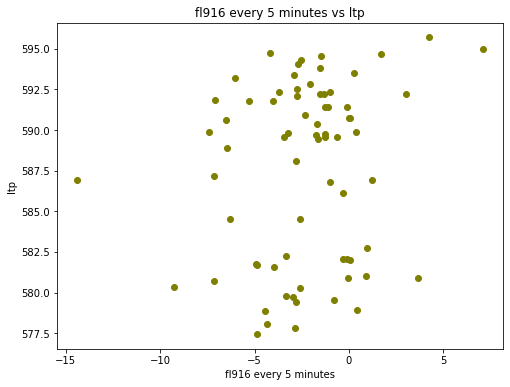

In [53]:
#fl916 wrt ltp per 5 minutes
plt.figure(figsize=(8,6))
plt.scatter(data_v6.fl916_5min, data_v6.ltp, color='olive')
plt.xlabel('fl916 every 5 minutes')
plt.ylabel('ltp')
plt.title('fl916 every 5 minutes vs ltp')
plt.show()

In [54]:
X = data_v6.filter(['pvr','volume','fl916_5min'])
y = data_v6['ltp']
X.tail()

,pvr,volume,fl916_5min
66,0.8,17253528.0,-7.14
67,0.9,17693987.0,0.96
68,0.9,18136625.0,-4.90
69,0.9,18627602.0,-0.07
70,0.9,18973645.0,-2.61


In [55]:
y.tail()

66    580.70
67    582.75
68    581.75
69    580.90
70    580.25
Name: ltp, dtype: float64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

print(len(X_train.index))
print(len(X_test.index))
print(len(y_train.index))
print(len(y_test.index))

56
15
56
15


In [57]:
#linear regression model 5
lm5 = LinearRegression()  # create object for the class
model_5=lm5.fit(X_train, y_train)  # perform linear regression
Y_pred = lm5.predict(X_test)  # make predictions

print(Y_pred)
#Y_pred predict dependent values

[590.06047929 590.18480575 584.9383619  590.8420703  588.40824482
 583.809083   593.38135384 582.09970156 588.7321054  577.32716465
 582.40712283 590.47628636 588.80446805 587.00392058 588.50818351]


In [58]:
#calculating accuracy of the model :

r2_1=r2_score(y_test,Y_pred)
print('R-square of linear model ', r2_1)

R-square of linear model  0.8555924482929707


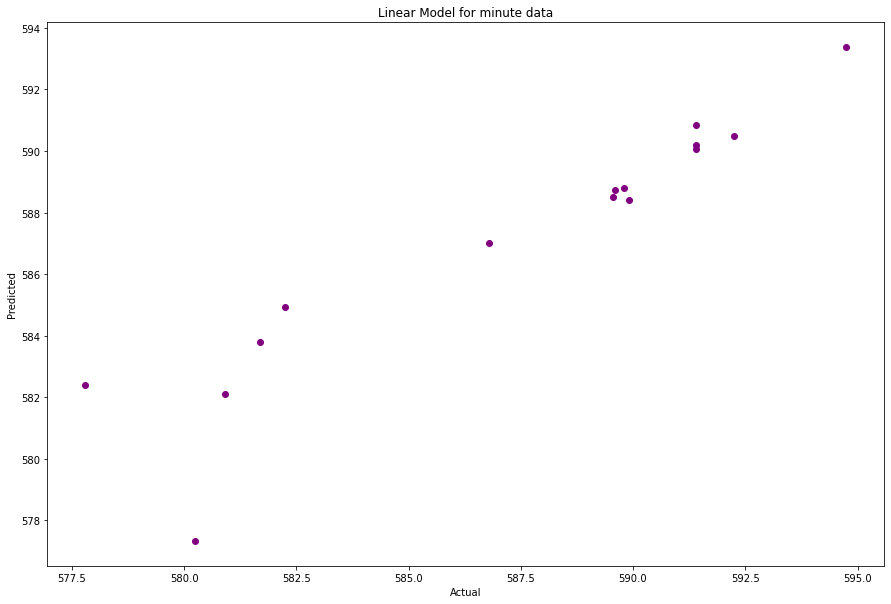

In [59]:
#plotting regression model

plt.figure(figsize=(15,10))
plt.scatter(y_test, Y_pred, color='purple')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Model for minute data')
plt.show()